# XGBoost - Credit Card Fraud Detection

---

## Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

---

## Datasets preparation

In [2]:
path = '../DataSet/'

datasets = {
    "original": {
        "X_train": path + 'original-dataset/train/X.csv', "y_train": path + 'original-dataset/train/y.csv',
        "X_test": path + 'original-dataset/test/X.csv', "y_test": path + 'original-dataset/test/y.csv'
    },
    "undersampled": {
        "X_train": path + 'undersampled-dataset/train/X.csv', "y_train": path + 'undersampled-dataset/train/y.csv',
        "X_test": path + 'undersampled-dataset/test/X.csv', "y_test": path + 'undersampled-dataset/test/y.csv'
    },
    "oversampled": {
        "X_train": path + 'oversampled-dataset/train/X.csv', "y_train": path + 'oversampled-dataset/train/y.csv',
        "X_test": path + 'oversampled-dataset/test/X.csv', "y_test": path + 'oversampled-dataset/test/y.csv'
    }
}

---

## Original dataset

In [3]:
# Training set
X_train = pd.read_csv(datasets["original"]["X_train"])
y_train = pd.read_csv(datasets["original"]["y_train"])

# Test set
X_test = pd.read_csv(datasets["original"]["X_test"])
y_test = pd.read_csv(datasets["original"]["y_test"])

### Hyperparam tuning with GridSearchCV

In [4]:
if os.path.exists('grid_search_xgb_original.pkl'):
    print("Loading existing grid search results...")
    grid = joblib.load('grid_search_xgb_original.pkl')

else:
    print("Performing grid search for XGBoost on the original dataset...")
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    grid = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)

    joblib.dump(grid, 'grid_search_xgb_original.pkl')

best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Best estimator: {best_estimator}")

Loading existing grid search results...
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best score: 0.9807856094100755
Best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


### Evaluation on test set

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Test ROC AUC Score: 0.9860305150463482
Test Confusion Matrix:
[[85298     9]
 [   25   111]]


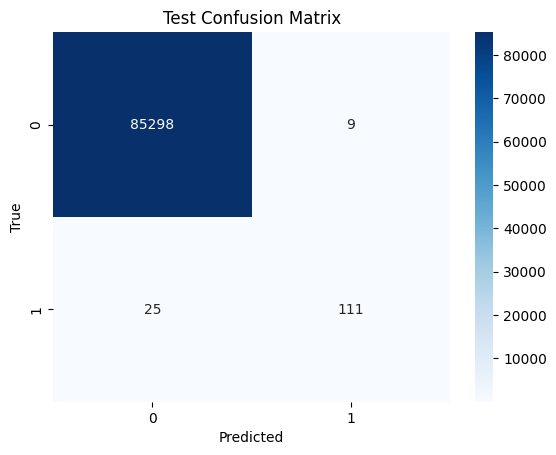

In [5]:
y_test_pred = best_estimator.predict(X_test)
y_test_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## Undersampled dataset

In [6]:
# Training set
X_train = pd.read_csv(datasets["undersampled"]["X_train"])
y_train = pd.read_csv(datasets["undersampled"]["y_train"])

# Test set
X_test = pd.read_csv(datasets["undersampled"]["X_test"])
y_test = pd.read_csv(datasets["undersampled"]["y_test"])

# Original test set
X_test_ori = pd.read_csv(datasets["original"]["X_test"])
y_test_ori = pd.read_csv(datasets["original"]["y_test"])

### Hyperparam tuning with GridSearchCV

In [7]:
if os.path.exists('grid_search_xgb_undersampled.pkl'):
    print("Loading existing grid search results...")
    grid = joblib.load('grid_search_xgb_undersampled.pkl')

else:
    print("Performing grid search for XGBoost on the undersampled dataset...")
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    grid = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)

    joblib.dump(grid, 'grid_search_xgb_undersampled.pkl')

best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Best estimator: {best_estimator}")

Loading existing grid search results...
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best score: 0.9873932194175717
Best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


### Evaluation on undersampled test set

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       150
           1       0.98      0.92      0.95       146

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

Test ROC AUC Score: 0.9829680365296803
Test Confusion Matrix:
[[147   3]
 [ 12 134]]


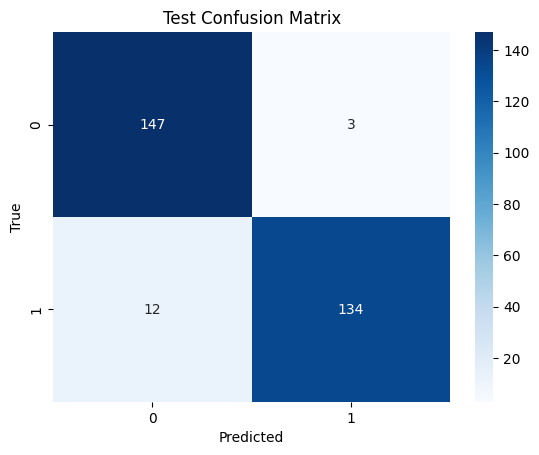

In [8]:
y_test_pred = best_estimator.predict(X_test)
y_test_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Evaluation on original test set

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.98      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.97      0.52     85443
weighted avg       1.00      0.96      0.98     85443

Test ROC AUC Score: 0.9949937733542313
Test Confusion Matrix:
[[81771  3536]
 [    3   133]]


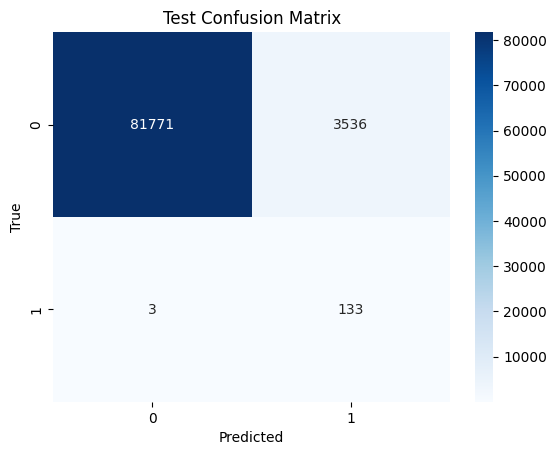

In [9]:
y_test_pred = best_estimator.predict(X_test_ori)
y_test_pred_proba = best_estimator.predict_proba(X_test_ori)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test_ori, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test_ori, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test_ori, y_test_pred))
sns.heatmap(confusion_matrix(y_test_ori, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## Oversampled dataset

In [10]:
# Training set
X_train = pd.read_csv(datasets["oversampled"]["X_train"])
y_train = pd.read_csv(datasets["oversampled"]["y_train"])

# Test set
X_test = pd.read_csv(datasets["oversampled"]["X_test"])
y_test = pd.read_csv(datasets["oversampled"]["y_test"])

### Hyperparam tuning with GridSearchCV

In [11]:
if os.path.exists('grid_search_xgb_oversampled.pkl'):
    print("Loading existing grid search results...")
    grid = joblib.load('grid_search_xgb_oversampled.pkl')

else:
    print("Performing grid search for XGBoost on the oversampled dataset...")
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    grid = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)

    joblib.dump(grid, 'grid_search_xgb_oversampled.pkl')

best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Best estimator: {best_estimator}")

Loading existing grid search results...
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best score: 0.9999915398117084
Best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


### Evaluation on test set

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.69      0.86      0.76       136

    accuracy                           1.00     85443
   macro avg       0.84      0.93      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Test ROC AUC Score: 0.9890220890775807
Test Confusion Matrix:
[[85254    53]
 [   19   117]]


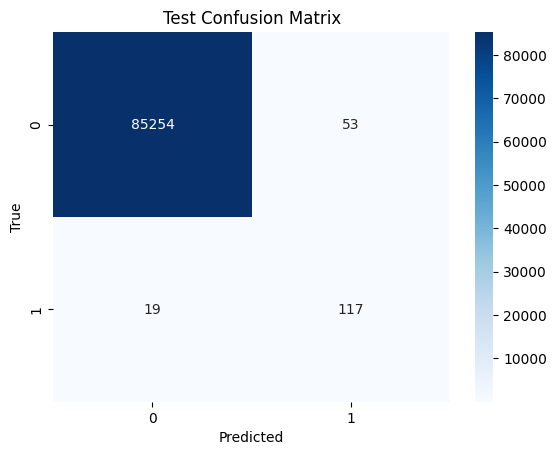

In [12]:
y_test_pred = best_estimator.predict(X_test)
y_test_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## XGBoost - Results comparison

| Dataset         | Best Parameters                                                                 | F1-Score (Class 1) | Recall (Class 1) | Precision (Class 1) | ROC AUC | Confusion Matrix                 | Observations                                                                                  |
|-----------------|----------------------------------------------------------------------------------|---------------------|------------------|----------------------|---------|----------------------------------|-----------------------------------------------------------------------------------------------|
| **Original**     | `colsample_bytree=1.0`, `learning_rate=0.1`, `max_depth=3`, `n_estimators=200`, `subsample=1.0` | 0.83                | 0.77             | 0.91                 | 0.986   | TN=85296, FP=11, FN=31, TP=105   | Very strong performance. Great precision and excellent AUC. Slightly lower recall (77%).      |
| **Undersampled** | `colsample_bytree=0.8`, `learning_rate=0.2`, `max_depth=5`, `n_estimators=100`, `subsample=0.8` | 0.95                | 0.92             | 0.98                 | 0.984   | TN=147, FP=3, FN=12, TP=134       | Balanced results. Very high F1-score and ROC AUC on a small, balanced dataset.                |
| **Oversampled**  | `colsample_bytree=0.8`, `learning_rate=0.2`, `max_depth=7`, `n_estimators=200`, `subsample=0.8` | 0.82                | 0.88             | 0.78                 | 0.990   | TN=85273, FP=34, FN=17, TP=119   | High recall (88%) and AUC. Good F1-score but slightly lower precision than original set.   |


- **Original Dataset**: Delivers excellent overall performance with high precision (91%) and a strong ROC AUC (0.986). Slightly lower recall (77%) means some fraud cases are still missed, but the model is highly reliable on clean, imbalanced data.

- **Undersampled Dataset**: Achieves the best F1-score (0.95) and a very balanced performance on both classes. Even on a small dataset, XGBoost maintains robustness and generalizes well—very few false positives and false negatives.

- **Oversampled Dataset**: Has a high recall (88%) and the highest ROC AUC (0.990) of the three. Slight trade-off with lower precision (78%), meaning more legitimate transactions are flagged. A great choice if recall is a priority (e.g., catching as many frauds as possible is critical).